<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Neural%20Networks/TA/mlpNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import torch
from torch import nn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [ ]:
# Get cpu, gpu or mps device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


## Get training data
Data used for this notebook is from a Kaggle competition  
Link to the competition: https://www.kaggle.com/c/santander-customer-transaction-prediction  

In [ ]:
df_train = pd.read_csv('data/train.csv')

print(df_train.shape)
df_train.head(5)

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## Pre-processing data

In [ ]:
var_columns = [c for c in df_train.columns if c not in ('ID_code','target')]
len(var_columns)

200

Using SciKitLearn Scalers
https://scikit-learn.org/1.5/api/sklearn.preprocessing.html

In [ ]:
scaler = MinMaxScaler()

df_train[var_columns] = scaler.fit_transform(df_train[var_columns])
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,...,0.532601,0.521950,0.470032,0.502746,0.483477,0.536917,0.507605,0.488022,0.483899,0.527460
std,0.300653,0.152716,0.159324,0.153221,0.154463,0.139968,0.157852,0.142057,0.152988,0.161333,...,0.140158,0.155773,0.121015,0.132779,0.162998,0.149925,0.167666,0.152592,0.152223,0.154974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.404160,0.405322,0.383234,0.400217,0.414637,0.428839,0.396761,0.384659,0.396368,...,0.431376,0.404422,0.385063,0.411373,0.360573,0.429027,0.376952,0.379516,0.380712,0.410436
50%,0.000000,0.508191,0.528530,0.491004,0.518970,0.520277,0.556658,0.497967,0.497138,0.527633,...,0.531653,0.517279,0.467860,0.504894,0.481614,0.533706,0.510850,0.484718,0.487100,0.534987
75%,0.000000,0.620387,0.645236,0.603369,0.632294,0.619692,0.672246,0.599256,0.615573,0.650798,...,0.630091,0.628818,0.553659,0.598340,0.608396,0.638836,0.638353,0.601460,0.594820,0.648661
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split training data into dependent and independent variables

In [ ]:
X_np = df_train.loc[:, var_columns].to_numpy()
y_np = df_train.loc[:, 'target'].to_numpy()

In [ ]:
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).reshape(-1,1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(torch.Size([160000, 200]),
 torch.Size([40000, 200]),
 torch.Size([160000, 1]),
 torch.Size([40000, 1]))

# basic Model

## Define model structure

In [ ]:
import torch.nn.functional as F

class model2(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(200, 80)
        self.fc2 = nn.Linear(80, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

model2 = model2()
print(model2)

model2(
  (fc1): Linear(in_features=200, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=200, out_features=80, bias=True)
  (1): ReLU()
  (2): Linear(in_features=80, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


## Training

**Loss function and Optimizer**

PyTorch Loss Functions: https://pytorch.org/docs/main/nn.html#loss-functions

PyTorch Optimizers: https://pytorch.org/docs/stable/optim.html#algorithms

In [ ]:
# HyperParameters
n_epochs = 40
batch_size = 1000
learning_rate = 0.1

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
loss_train_list=[]
loss_val_list=[]

for epoch in range(n_epochs):
    for b in range(0, X_train.shape[0], batch_size):
        model.train()

        # Get data
        X_train_batch = X_train[b:b+batch_size]
        y_train_batch = y_train[b:b+batch_size]

        y_train_batch_pred = model(X_train_batch)

        # Calculate loss
        loss_train = criterion(y_train_batch_pred, y_train_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    # Evaluation on val data
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        loss_val = criterion(y_val_pred, y_val)
        loss_train_list.append(loss_train.item())
        loss_val_list.append(loss_val.item())
        print(f'Epoch {epoch+1}, training loss {loss_train}, validation loss {loss_val}')

Epoch 1, training loss 0.26993462443351746, validation loss 0.3294343650341034
Epoch 2, training loss 0.2675694227218628, validation loss 0.32691338658332825
Epoch 3, training loss 0.2634102702140808, validation loss 0.3228098452091217
Epoch 4, training loss 0.25475287437438965, validation loss 0.3149859309196472
Epoch 5, training loss 0.23625585436820984, validation loss 0.2965342402458191
Epoch 6, training loss 0.2376328557729721, validation loss 0.2733604609966278
Epoch 7, training loss 0.22214294970035553, validation loss 0.26323628425598145
Epoch 8, training loss 0.19949471950531006, validation loss 0.2548817992210388
Epoch 9, training loss 0.21971753239631653, validation loss 0.2519630491733551
Epoch 10, training loss 0.22664064168930054, validation loss 0.2483988255262375
Epoch 11, training loss 0.23055334389209747, validation loss 0.24752987921237946
Epoch 12, training loss 0.21436743438243866, validation loss 0.24219775199890137
Epoch 13, training loss 0.2044326812028885, vali

Plot Loss

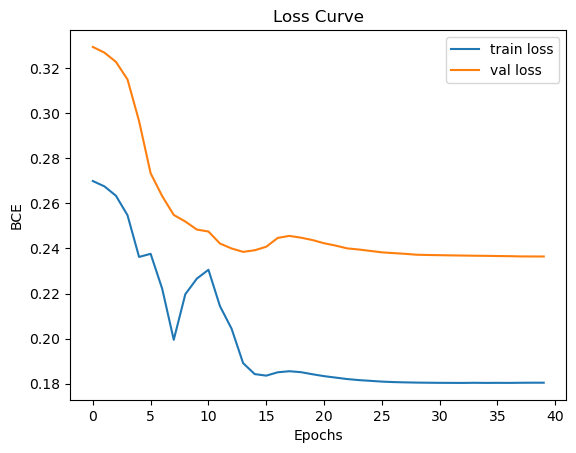

In [ ]:
plt.plot(loss_train_list, label='train loss')
plt.plot(loss_val_list, label='val loss')
plt.title('Loss Curve')
plt.ylabel('BCE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Save model

In [ ]:
save_path = './my_model.pth'
torch.save(model.state_dict(), save_path)

## Model performance

Load model

In [ ]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

using SciKitLearn Metrics

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

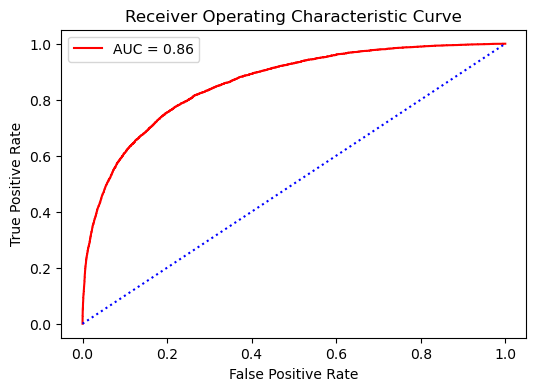

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='red', lw=1.5, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', lw=1.5, linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

threshold = 0.5
y_hat = (y_val_pred.detach().numpy() > threshold).astype(int)
y_true = y_val.detach().numpy()
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     35903
         1.0       0.74      0.24      0.36      4097

    accuracy                           0.91     40000
   macro avg       0.83      0.61      0.66     40000
weighted avg       0.90      0.91      0.89     40000



# Activation Functions

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

## 1. Sigmoid
$$ Sigmoid(x)=\frac{1}{1+e^{-x}} $$

**Pros**:
- Sigmoid outputs values between 0 and 1, which is useful for binary classification where the goal is to produce probabilities
- Well-suited for the output layer of binary classification models  

**Cons:**
- Suffers from the vanishing gradient problem, making it less effective in deep networks
- Outputs are not zero-centered, which can slow down learning in some cases  


In [ ]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.Sigmoid(),
    nn.Linear(80, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, optimizer = torch.optim.SGD(model.parameters(), lr=0.1)):
    loss_fn = nn.BCELoss()
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    n_epochs = 10
    batch_size = 1000

    for epoch in range(n_epochs):
        for b in range(0, X_train.shape[0], batch_size):
            model.train()

            # Get data
            X_train_batch = X_train[b:b+batch_size]
            y_train_batch = y_train[b:b+batch_size]

            y_train_batch_pred = model(X_train_batch)

            # Calculate loss
            loss_train = criterion(y_train_batch_pred, y_train_batch)

            # Backpropagation
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

        # Evaluation on val data
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            loss_val = loss_fn(y_val_pred, y_val)
            print(f'Epoch {epoch+1}, training loss {loss_train}, validation loss {loss_val}')

    return model

def validation_auc(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)

    fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
    roc_auc = auc(fpr, tpr)
    return roc_auc

In [ ]:
model = train_model(model, X_train, y_train, X_val, y_val)
roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 1, training loss 0.27067840099334717, validation loss 0.33033066987991333
Epoch 2, training loss 0.2706601917743683, validation loss 0.3303159177303314
Epoch 3, training loss 0.2706473469734192, validation loss 0.33030059933662415
Epoch 4, training loss 0.270634263753891, validation loss 0.33028510212898254
Epoch 5, training loss 0.27062103152275085, validation loss 0.33026933670043945
Epoch 6, training loss 0.270607590675354, validation loss 0.33025336265563965
Epoch 7, training loss 0.27059394121170044, validation loss 0.3302370011806488
Epoch 8, training loss 0.2705800235271454, validation loss 0.3302203416824341
Epoch 9, training loss 0.27056577801704407, validation loss 0.33020326495170593
Epoch 10, training loss 0.2705512046813965, validation loss 0.33018583059310913

ROC AUC: 0.6694477501215528


## 2. Tanh

$$ tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $$

**Pros:**
- Similar to the sigmoid but zero-centered, which helps mitigate the vanishing gradient problem to some extent
- Outputs in the range of -1 to 1, providing better symmetry  

**Cons:**
- Still prone to the vanishing gradient problem, especially in deep networks
- Can saturate and kill gradients if not used carefully  


In [ ]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.Tanh(),
    nn.Linear(80, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 1, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 2, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 3, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 4, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 5, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 6, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 7, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 8, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 9, training loss 0.5872752666473389, validation loss 0.594764232635498
Epoch 10, training loss 0.5872752666473389, validation loss 0.594764232635498

ROC AUC: 0.5097520853095135


## 3. ReLU (Rectified linear unit)

$$ ReLU(x)=max(0,x) $$

**Pros:**
- Simple and computationally efficient
- Mitigates the vanishing gradient problem
- Allows the model to learn quickly and often leads to sparser representations  

**Cons:**
- Prone to the "dying ReLU" problem, where neurons can become inactive during training
- Not zero-centered, which may lead to convergence issues in some cases  


In [ ]:
# Model Architecture
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 1, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 2, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 3, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 4, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 5, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 6, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 7, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 8, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 9, training loss 0.7270398736000061, validation loss 0.7249922752380371
Epoch 10, training loss 0.7270398736000061, validation loss 0.7249922752380371

ROC AUC: 0.4600799800993362


## 4. Leaky ReLU

$$
\begin{equation}
    LeakyReLU(x) =
    \begin{cases}
      x, & \text{if}\ x>0 \\
      NegativeSlope\times  x, & \text{otherwise}
    \end{cases}
\end{equation}
$$

_Negative slope is supposed to be small_

**Pros:**
- Addresses the "dying ReLU" problem by allowing a small gradient for negative inputs
- Maintains the advantages of ReLU while reducing the risk of dead neurons  

**Cons:**
- May not perform well on all types of data  

In [ ]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.LeakyReLU(),
    nn.Linear(80, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

roc_auc = validation_auc(model, X_val, y_val)
print(f"ROC AUC: {roc_auc}")

Epoch 1, training loss 0.26865798234939575, validation loss 0.3289802670478821
Epoch 2, training loss 0.2664855122566223, validation loss 0.3267322778701782
Epoch 3, training loss 0.2628720700740814, validation loss 0.32316961884498596
Epoch 4, training loss 0.25516146421432495, validation loss 0.31636494398117065
Epoch 5, training loss 0.23758377134799957, validation loss 0.30155786871910095
Epoch 6, training loss 0.2601968050003052, validation loss 0.277879536151886
Epoch 7, training loss 0.26150524616241455, validation loss 0.26963183283805847
Epoch 8, training loss 0.25344544649124146, validation loss 0.26225170493125916
Epoch 9, training loss 0.2245950549840927, validation loss 0.25063884258270264
Epoch 10, training loss 0.19162686169147491, validation loss 0.24756138026714325
ROC AUC: 0.8572203922848529


## 5.Softmax Function

$$
Softmax(x) = \frac{e^{x}}{\sum_{j} e^{x_{j}}}
$$

**Pros:**
- Converts raw scores into a probability distribution over multiple classes
- Useful for multi-class classification problems  

**Cons:**
- Sensitive to outliers in the input
- Outputs are not independent of each other, and the highest probability class dominates the others  

**We should use One-hot encoding to use Softmax as Activation Function**

In [ ]:
y_train_flat = y_train.view(-1)
y_train_one_hot = torch.nn.functional.one_hot(y_train_flat.to(torch.int64), num_classes=2).to(torch.float32)

y_val_flat = y_val.view(-1)
y_val_one_hot = torch.nn.functional.one_hot(y_val_flat.to(torch.int64), num_classes=2).to(torch.float32)

In [ ]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.Softmax(dim=1)
)

model = train_model(model, X_train, y_train_one_hot, X_val, y_val_one_hot)

model.eval()
with torch.no_grad():
    y_val_pred = model(X_val)

fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred[:,1].detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc}")

Epoch 1, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 2, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 3, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 4, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 5, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 6, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 7, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 8, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 9, training loss 0.529346764087677, validation loss 0.5415827035903931
Epoch 10, training loss 0.529346764087677, validation loss 0.5415827035903931
ROC AUC: 0.4536861793918717


# Optimizers

https://pytorch.org/docs/stable/optim.html#algorithms

Most Common Optimizers:
- SGD
- Adam
- Adagrad
- RMSprop

# Regularization


## 1. Batch normalization

Batch Normalization (BatchNorm) calculates the mean and variance of the activations for each feature in a mini-batch. It then normalizes the activations using these statistics, and scales and shifts them using learnable parameters.

Batch normalization can help reduce the internal covariate shift that can occur during training. This allows the next layer to analyze the data more effectively.

[Pytorch Normalization Layers](https://pytorch.org/docs/stable/nn.html#normalization-layers)

[Pytorch BatchNorm1d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d)

[Link to paper](https://arxiv.org/abs/1502.03167)

In [ ]:
model = nn.Sequential(
    nn.Linear(200, 20),
    nn.BatchNorm1d(20),
    nn.ReLU(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

model = model = train_model(model, X_train, y_train, X_val, y_val)

roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 1, training loss 0.4499523937702179, validation loss 0.468171089887619
Epoch 2, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 3, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 4, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 5, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 6, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 7, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 8, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 9, training loss 0.4499523937702179, validation loss 0.46817076206207275
Epoch 10, training loss 0.4499523937702179, validation loss 0.46817076206207275

ROC AUC: 0.49401210136951945


## 2. Dropout layers

Dropout randomly disables a portion of neurons during training to prevent overfitting and improve generalization.

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

In [ ]:
model = nn.Sequential(
    nn.Linear(200, 20),
    nn.ReLU(),
    nn.Dropout(p=0.1),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 1, training loss 0.8982554078102112, validation loss 0.8862695097923279
Epoch 2, training loss 0.8994381427764893, validation loss 0.8862695097923279
Epoch 3, training loss 0.8980686068534851, validation loss 0.8862695097923279
Epoch 4, training loss 0.899352490901947, validation loss 0.8862695097923279
Epoch 5, training loss 0.9006611108779907, validation loss 0.8862695097923279
Epoch 6, training loss 0.8975787162780762, validation loss 0.8862695097923279
Epoch 7, training loss 0.8980845808982849, validation loss 0.8862695097923279
Epoch 8, training loss 0.898587167263031, validation loss 0.8862695097923279
Epoch 9, training loss 0.8987641930580139, validation loss 0.8862695097923279
Epoch 10, training loss 0.8991298675537109, validation loss 0.8862695097923279

ROC AUC: 0.5727053009039605


## 3. L2 regularization (weight_decay)

prevent overfitting by adding a penalty to the model's complexity.

**Mathematical Formulation**:

  $$ \text{Loss} = \text{Original Loss} + \lambda \sum_{i=1}^{n} w_i^2 $$

  where:
  - $ w_i $ are the weights of the model,
  - $\lambda$ is the regularization parameter that controls the strength of the penalty. Larger values of $\lambda $ increase regularization.


In [ ]:
model = nn.Sequential(
    nn.Linear(200, 20),
    nn.ReLU(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)

model = train_model(model, X_train, y_train, X_val, y_val, optimizer)

roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 1, training loss 0.26430773735046387, validation loss 0.37185996770858765
Epoch 2, training loss 0.2610747516155243, validation loss 0.36623746156692505
Epoch 3, training loss 0.2628936469554901, validation loss 0.35691240429878235
Epoch 4, training loss 0.2618221342563629, validation loss 0.35188528895378113
Epoch 5, training loss 0.2606806755065918, validation loss 0.33724096417427063
Epoch 6, training loss 0.2598814368247986, validation loss 0.3528764843940735
Epoch 7, training loss 0.33808135986328125, validation loss 0.48207393288612366
Epoch 8, training loss 0.27953848242759705, validation loss 0.33283448219299316
Epoch 9, training loss 0.26521649956703186, validation loss 0.3855140507221222
Epoch 10, training loss 0.2784571945667267, validation loss 0.5948811769485474

ROC AUC: 0.4967732566046565


## 4. Early Stopping

Early stopping involves monitoring the performance of the model on a validation set during training and stopping the training process once the performance stops improving or begins to degrade

In [ ]:
model = nn.Sequential(
    nn.Linear(200, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

batch_size = 1000
n_epochs = 15

best_val_loss = float('inf')
for epoch in range(n_epochs):
    for b in range(0, X_train.shape[0], batch_size):
        # Start training
        model.train()

        # Get data in batches
        X_train_batch = X_train[b:b+batch_size]
        y_train_batch = y_train[b:b+batch_size]

        # Make predictions
        y_train_batch_pred = model(X_train_batch)

        # Calculate loss
        loss_train = loss_fn(y_train_batch_pred, y_train_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    # Start Evaluation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        loss_val = loss_fn(y_val_pred, y_val)
        print(f'Epoch {epoch}, training loss {loss_train}, validation loss {loss_val}')

        if loss_val < best_val_loss:
            best_val_loss = loss_val
            # Save the model snapshot if needed
            torch.save(model.state_dict(), "best_model.pth")
        else:
            print("\nEarly stopping triggered...")
            model.load_state_dict(torch.load("best_model.pth"))
            break

Epoch 0, training loss 0.27076825499534607, validation loss 0.3303796350955963
Epoch 1, training loss 0.2707497775554657, validation loss 0.3303796648979187

Early stopping triggered...


## 5. Data Augmentation

- Data augmentation is a regularization technique to artificially increase the size of the training dataset by applying various transformations to the existing data
- The goal is to expose the model to a wider range of variations in the input data, helping it become more robust and generalize better to unseen examples
- Data augmentation acts as a form of regularization by introducing variability, preventing the model from memorizing the training set and promoting more robust feature learning
- Most commonly used for computer vision applications

![download.png](attachment:download.png)

![flip.png](attachment:flip.png)

---

Author: Arman Forouzesh, 2024